In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visulization
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iaa-comptition-2020/student-mat-dataset-test.csv
/kaggle/input/iaa-comptition-2020/student-mat-dataset_train.csv


---
# **1** - Data Acquisition
---

In [2]:
#1 - Data acquisition
data=pd.read_csv("../input/iaa-comptition-2020/student-mat-dataset_train.csv",delimiter=";")

In [3]:
data.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


# **2 - data prepartion**

In [4]:
data.shape

(280, 34)

In [5]:
data.columns

Index(['id', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          280 non-null    int64 
 1   school      280 non-null    object
 2   sex         280 non-null    object
 3   age         280 non-null    int64 
 4   address     280 non-null    object
 5   famsize     280 non-null    object
 6   Pstatus     280 non-null    object
 7   Medu        280 non-null    int64 
 8   Fedu        280 non-null    int64 
 9   Mjob        280 non-null    object
 10  Fjob        280 non-null    object
 11  reason      280 non-null    object
 12  guardian    280 non-null    object
 13  traveltime  280 non-null    int64 
 14  studytime   280 non-null    int64 
 15  failures    280 non-null    int64 
 16  schoolsup   280 non-null    object
 17  famsup      280 non-null    object
 18  paid        280 non-null    object
 19  activities  280 non-null    object
 20  nursery   

In [7]:
data.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,140.500000,16.200000,2.807143,2.571429,1.410714,1.971429,0.335714,3.928571,3.217857,3.110714,1.457143,2.292857,3.592857,5.660714,10.610714,10.578571,10.407143
std,80.973247,1.082278,1.070266,1.081900,0.687231,0.829067,0.786177,0.905126,0.990476,1.147801,0.890986,1.354649,1.408609,8.219386,3.357209,3.959595,4.545109
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,70.750000,15.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,8.000000
50%,140.500000,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,10.000000,10.000000,11.000000
75%,210.250000,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,280.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
data.isnull().any()


id            False
school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
data.isnull().sum()

id            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

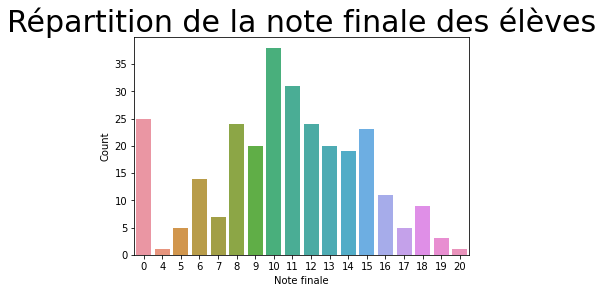

In [10]:

import matplotlib.pyplot as plt
figure= sns.countplot(data['G3'])
figure.axes.set_title('Répartition de la note finale des élèves', fontsize = 30)
figure.set_xlabel("Note finale")
figure.set_ylabel("Count")
plt.show()

In [11]:
print("le nombre d' étudiants masculin :",len(data[data['sex']=="M"]))
print("le nombre d'étudiants Feminin:",len(data[data['sex']=="F"]))

le nombre d' étudiants masculin : 143
le nombre d'étudiants Feminin: 137


Text(0, 0.5, 'Count')

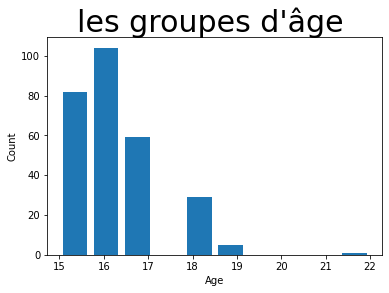

In [12]:
plt.title('les groupes d\'âge ', fontsize = 30)
plt.hist(data.age,rwidth=0.8)
plt.xlabel("Age")
plt.ylabel("Count")

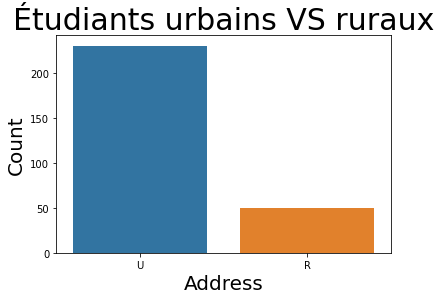

In [13]:
fig = sns.countplot(data['address'])
fig.axes.set_title('Étudiants urbains VS ruraux', fontsize = 30)
fig.set_xlabel('Address', fontsize = 20)
fig.set_ylabel('Count', fontsize = 20)
plt.show()

In [14]:
#avoir les corrélations des attributs avec G3 par ordre croissant
data.corr()['G3'].sort_values()


failures     -0.406515
age          -0.229376
goout        -0.198983
id           -0.169301
traveltime   -0.126019
health       -0.090462
Walc         -0.056692
Dalc         -0.044355
absences      0.008220
freetime      0.009685
studytime     0.018317
famrel        0.064597
Fedu          0.159524
Medu          0.218824
G1            0.804838
G2            0.929286
G3            1.000000
Name: G3, dtype: float64

In [15]:
data['school'].value_counts()


GP    280
Name: school, dtype: int64

In [16]:
data.groupby('sex')['G3'].mean()

sex
F     9.817518
M    10.972028
Name: G3, dtype: float64

In [17]:

data.head()


,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:

data.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [19]:
#on supprime les colonnes suivantes
data_work=data.drop(["school", 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
         'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'romantic', 'goout', 'Dalc',
       'Walc', 'health','studytime','age','failures','famrel','internet','Medu','Fedu','freetime','id','absences'],axis=1)

In [20]:
import math
data_work['GradeAvg'] =round((data_work['G1'] + data_work['G2'] + data_work['G3']) / 3)



In [21]:
data_work.head()

,sex,G1,G2,G3,GradeAvg
0,F,5,6,6,6.0
1,F,5,5,6,5.0
2,F,7,8,10,8.0
3,F,15,14,15,15.0
4,F,6,10,10,9.0


In [22]:
data_work.head()

,sex,G1,G2,G3,GradeAvg
0,F,5,6,6,6.0
1,F,5,5,6,5.0
2,F,7,8,10,8.0
3,F,15,14,15,15.0
4,F,6,10,10,9.0


In [23]:
data_work.tail(5)

,sex,G1,G2,G3,GradeAvg
275,F,12,12,12,12.0
276,F,10,9,9,9.0
277,M,9,9,9,9.0
278,F,9,8,8,8.0
279,M,10,11,10,10.0


In [24]:
#Convertir en valeur catégorielle
#sex 
sexc = {'F': 1, 'M': 0}
data_work['sex'] = data_work['sex'].map(sexc)
#val={'yes': 1, 'no': 0}
#data_work['internet'] =data_work['internet'].map(val)






In [25]:
data_work.head(5)

,sex,G1,G2,G3,GradeAvg
0,1,5,6,6,6.0
1,1,5,5,6,5.0
2,1,7,8,10,8.0
3,1,15,14,15,15.0
4,1,6,10,10,9.0


In [26]:
#avoir les corrélations des attributs avec G3 par ordre croissant
data_work.corr()['G3'].sort_values()

sex        -0.127204
G1          0.804838
G2          0.929286
GradeAvg    0.964466
G3          1.000000
Name: G3, dtype: float64

In [27]:
data_work.columns

Index(['sex', 'G1', 'G2', 'G3', 'GradeAvg'], dtype='object')

1. # **3 - Model processing**

In [28]:
x_train=data_work.drop("G3",axis=1)
y_train=data_work["G3"]
y_train

0       6
1       6
2      10
3      15
4      10
       ..
275    12
276     9
277     9
278     8
279    10
Name: G3, Length: 280, dtype: int64

In [29]:
#build model
from sklearn.linear_model import LinearRegression 


In [30]:
L=LinearRegression()

In [31]:
L.fit(x_train, y_train)

LinearRegression()

In [32]:
data_test1=data=pd.read_csv("../input/iaa-comptition-2020/student-mat-dataset-test.csv",delimiter=";")
data_test1.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,281,GP,M,17,U,LE3,A,4,1,services,...,4,5,4,2,4,5,30,8,8,8
1,282,GP,M,17,U,LE3,A,3,2,teacher,...,4,4,4,3,4,3,19,11,9,10
2,283,GP,F,18,R,LE3,T,1,1,at_home,...,5,2,2,1,1,3,1,12,12,12
3,284,GP,F,18,U,GT3,T,1,1,other,...,5,4,4,1,1,4,4,8,9,10
4,285,GP,F,17,U,GT3,T,2,2,other,...,5,4,5,1,2,5,4,10,9,11


In [33]:
data_work_test=data_test1.drop(["school", 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
         'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'romantic', 'goout', 'Dalc',
       'Walc', 'health','studytime','age','failures','famrel','internet','freetime','Medu','Fedu','id','absences'],axis=1)
data_work_test

,sex,G1,G2,G3
0,M,8,8,8
1,M,11,9,10
2,F,12,12,12
3,F,8,9,10
4,F,10,9,11
...,...,...,...,...
110,M,9,9,9
111,M,14,16,16
112,M,10,8,7
113,M,11,12,10


In [34]:
import math
data_work_test['GradeAvg'] =round((data_work_test['G1'] + data_work_test['G2'] + data_work_test['G3']) / 3,3) 


In [35]:
data_work_test.head()

,sex,G1,G2,G3,GradeAvg
0,M,8,8,8,8.0
1,M,11,9,10,10.0
2,F,12,12,12,12.0
3,F,8,9,10,9.0
4,F,10,9,11,10.0


In [36]:
#Convertir en valeur catégorielle
#sex 
sexc = {'F': 1, 'M': 0}
data_work_test['sex'] = data_work_test['sex'].map(sexc)
#val={'yes': 1, 'no': 0}
#data_work_test['internet'] =data_work_test['internet'].map(val)


In [37]:
x_test=data_work_test.drop("G3",axis=1)
y_test=data_work_test["G3"]
y_test

0       8
1      10
2      12
3      10
4      11
       ..
110     9
111    16
112     7
113    10
114     9
Name: G3, Length: 115, dtype: int64

In [38]:
y_pred=L.predict(x_test)

In [39]:
print(L.score(x_test, y_test)) 


0.9866368097926388


In [40]:

from sklearn.linear_model import Ridge


L1=Ridge()


In [41]:
L1.fit(x_train, y_train)

Ridge()

In [42]:
y_pred1=L1.predict(x_test)

In [43]:
print(L1.score(x_test, y_test)) 


0.9855286254981859


In [44]:
from sklearn.linear_model import Lasso
L2=Lasso()
L2.fit(x_train, y_train)
y_pred2=L2.predict(x_test)
print(L2.score(x_test, y_test)) 

0.8746539003054526


1. # **4 - Deployment**

In [45]:
linear_prediction=pd.DataFrame(data=y_pred, index=data_test1['id'],columns=['target'])
linear_prediction=linear_prediction['target'].apply(lambda x: np.abs(int(np.round(x))))



In [46]:
linear_prediction.to_csv('linear_prediction.csv',index=True)